# [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset)
--------------------


In [1]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis exploratorio

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Desbalanceo de las clases
Aquí comprueba cuántas instancias tenemos de cada clase

In [6]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

### Exploración de las variables

Compara las variables entre sí para intentar inferir relaciones entre ellas

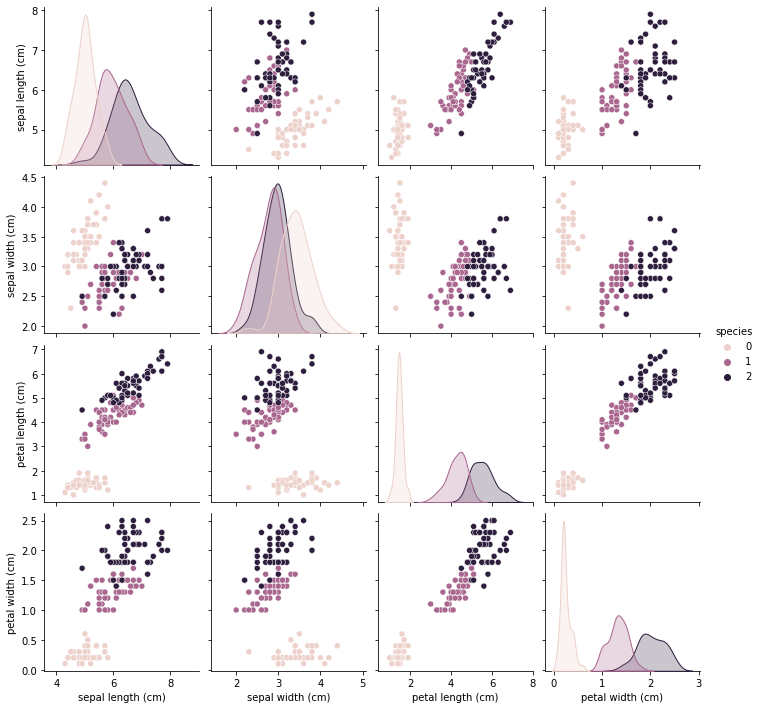

In [7]:
g = sns.pairplot(df, hue='species')
plt.show()

- Después de representar gráficamente las features, queda claro que la relación entre la especie `iris-setosa` es diferente de las de las otras dos especies. 
- Además, existe una cierta superposición en las features de las otras dos especies, `iris-versicolor` e `iris-virginica`.

<AxesSubplot:xlabel='species', ylabel='petal width (cm)'>

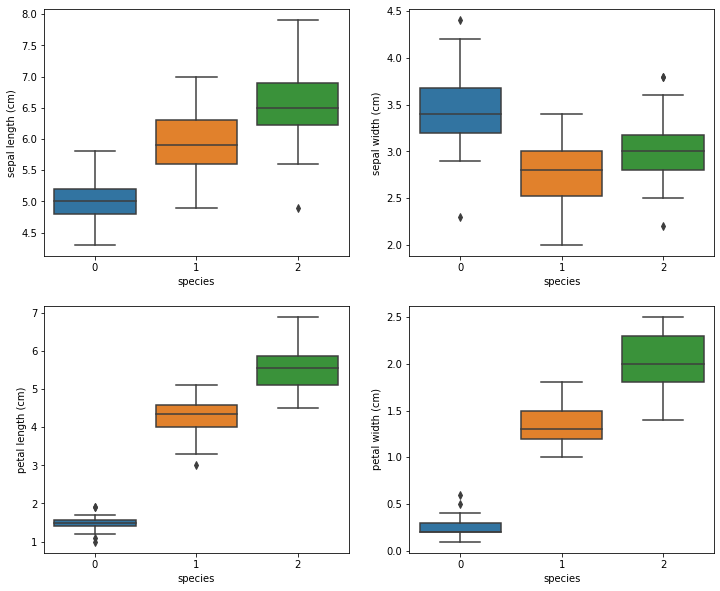

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y="sepal length (cm)",data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y="sepal width (cm)",data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y="petal length (cm)",data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y="petal width (cm)",data=df)

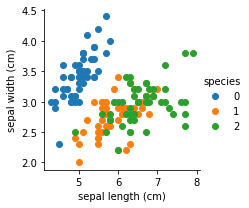

In [9]:
sns.FacetGrid(df, hue="species").map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()
plt.show()

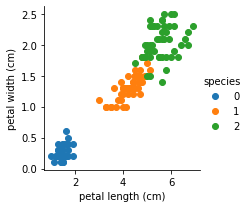

In [10]:
sns.FacetGrid(df, hue="species").map(plt.scatter,'petal length (cm)','petal width (cm)').add_legend()
plt.show()

## Preprocesamiento

### Valores nulos 

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
sepal length (cm),0,0.0
sepal width (cm),0,0.0
petal length (cm),0,0.0
petal width (cm),0,0.0
species,0,0.0


### Detección de outliers

<AxesSubplot:>

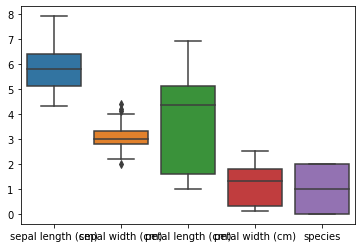

In [13]:
sns.boxplot(data=df)

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'species'}>, <AxesSubplot:>]],
      dtype=object)

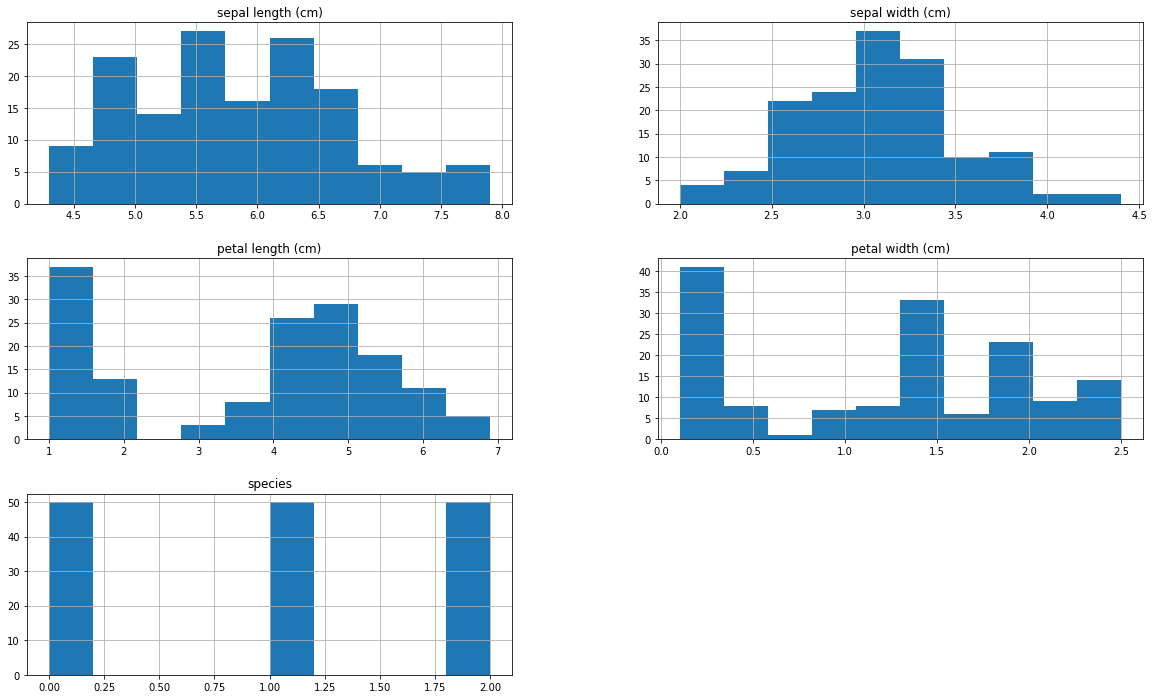

In [14]:
plt.rcParams['figure.figsize'] = (20, 12)
df.hist()

### Distintos órdenes de magnitud

In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Los ordenes de magnitud no son muy distintos, así que no hace falta hacer nada aquí

### Datos categóricos

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


No tenemos campos de tipo categoricos

## Selección de variables

Muestra la matriz de correlación de las variables

<AxesSubplot:>

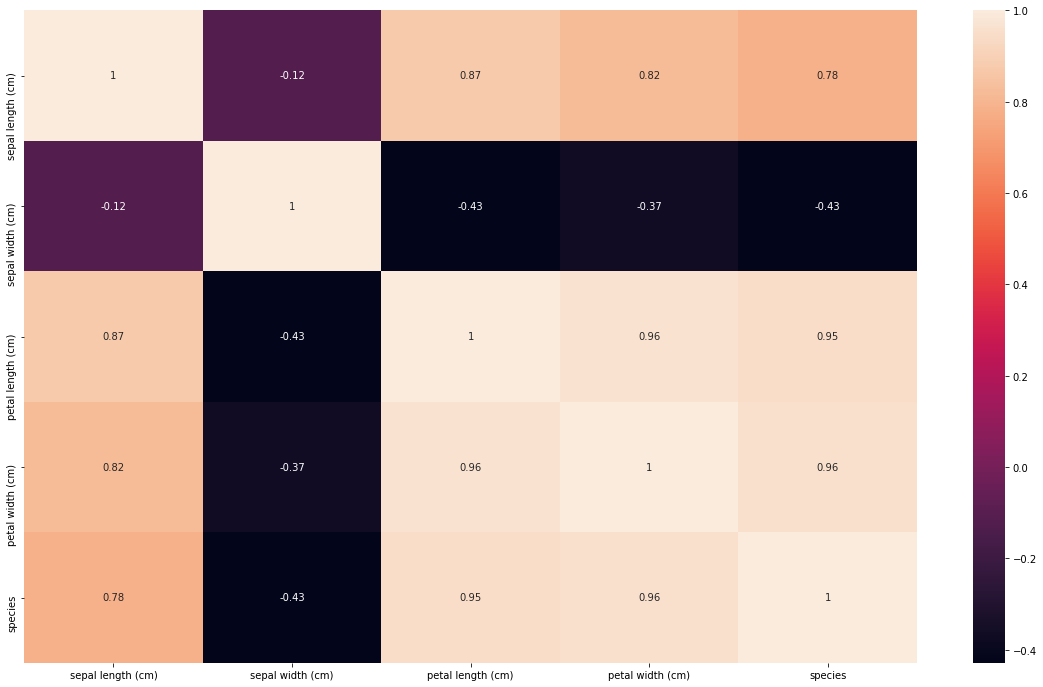

In [17]:
sns.heatmap(df.corr(), annot=True)

Para este ejemplo, nos vamos a quedar solo con las variables `sepal length (cm)` y `sepal width (cm)` (además de la `species`) para poder representar los datos en gráficos de 2d

In [18]:
df.drop(['petal length (cm)', 'petal width (cm)'], 1, inplace =True)
df.head()

,sepal length (cm),sepal width (cm),species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


## Entrenamiento de los modelos

In [19]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix

def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))
    
    disp = plot_confusion_matrix(clf, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()

Separa el dataset de entrenamiento en train y test

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("species", axis=1).values
y = df["species"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aquí almacenaremos el rendimiento de cada algoritmo para su posterior comparación
algorithm_accuracy = []

Aquí tenemos una clase que podemos utilizar luego para visualizar las áreas de decisión. No tienes que hacer nada de momento con ella, sólo ejecutarla

In [21]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    h = (x_max / x_min)/100
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    
                         np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    
    plt.show()

### Regresión logística

Aplica una regresión logística a los datos, usando la clase
```python
from sklearn.linear_model import LogisticRegression
```

Accuracy score: 83%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.44      0.62         9
           2       0.69      1.00      0.81        11

    accuracy                           0.83        30
   macro avg       0.90      0.81      0.81        30
weighted avg       0.89      0.83      0.82        30



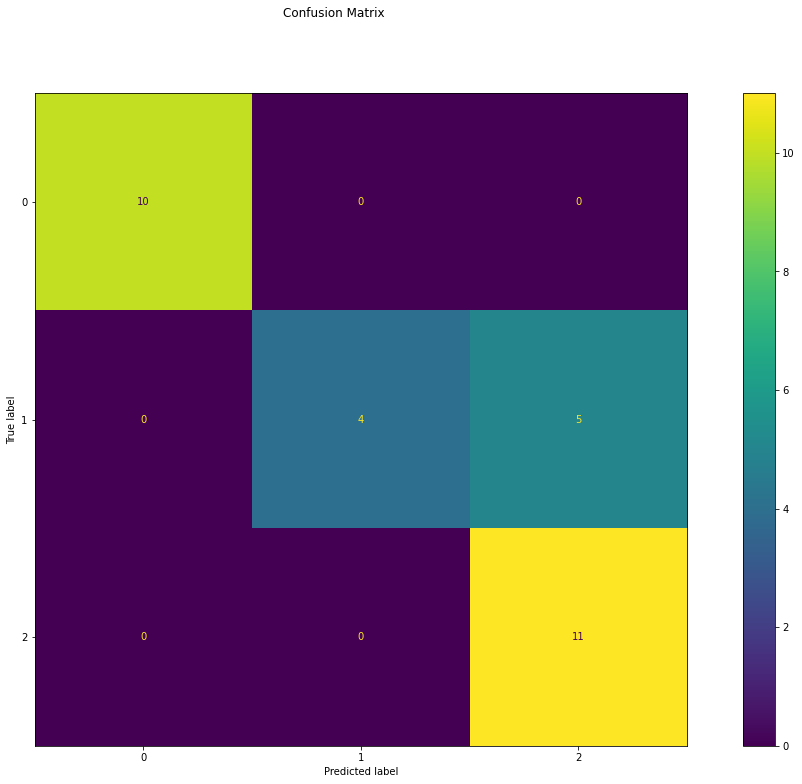

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', multi_class='auto')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

show_metrics(logreg, y_test, y_pred)
algorithm_accuracy.append((logreg, accuracy_score(y_test, y_pred)))

**Áreas de decisión**

Utiliza la función `plotSVC` para pintar las áreas de decisión del modelo que acabas de entrenar


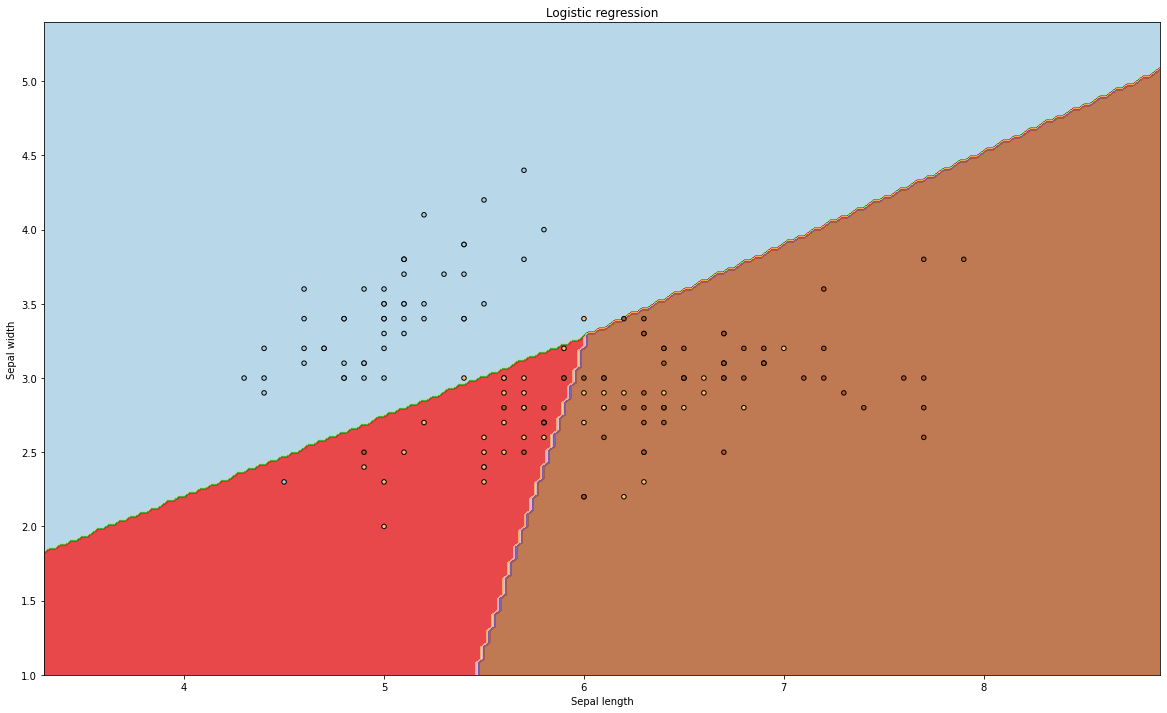

In [23]:
svc = logreg
plotSVC('Logistic regression')

Prueba con distintas combinaciones de parámetros y pinta los resultados.

Las variables que te aconsejo probar son:
```python
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
```

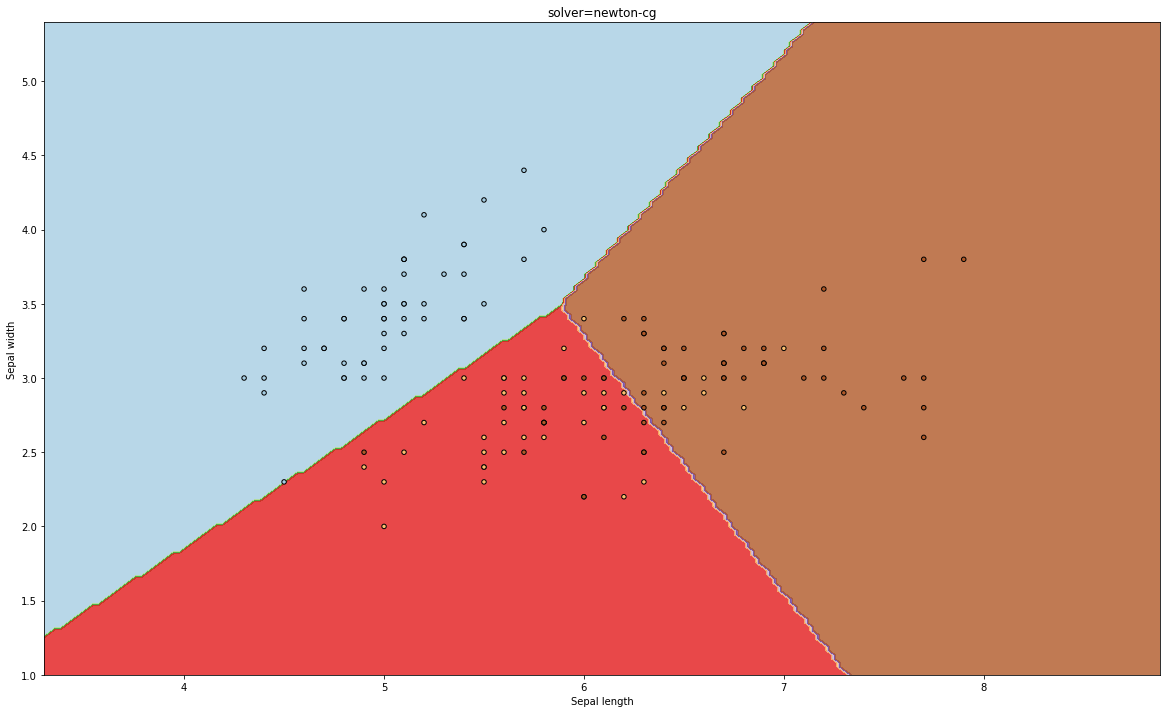

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


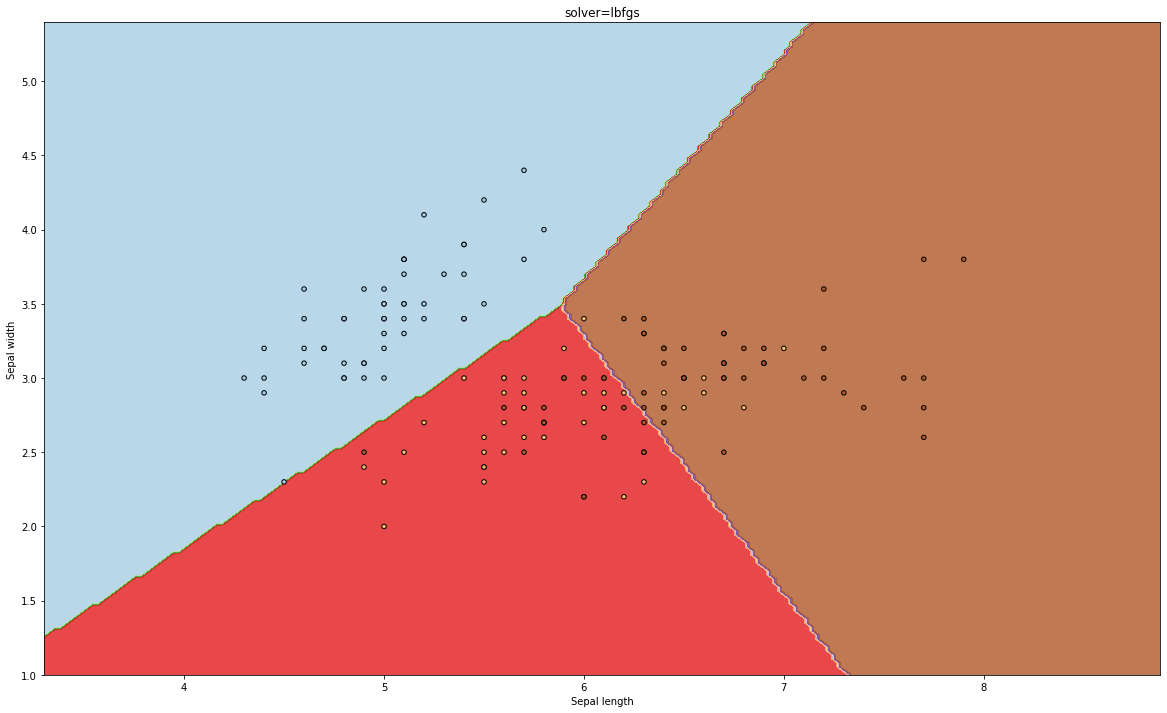

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


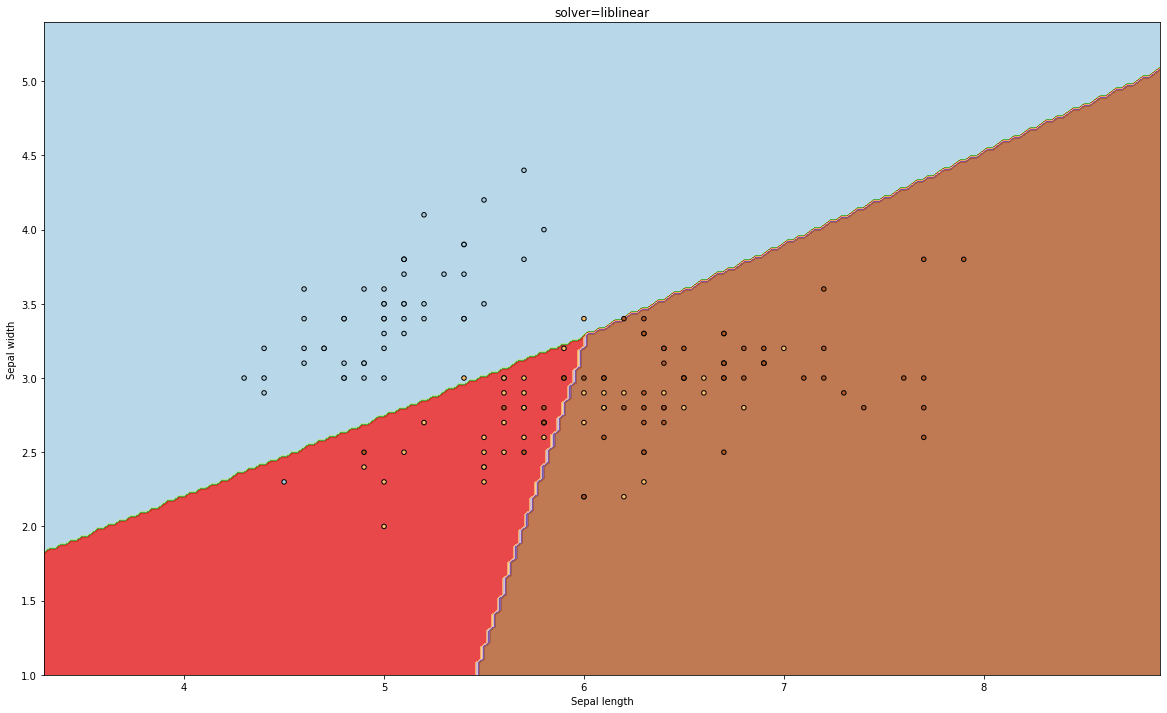

0.8333333333333334
[[10  0  0]
 [ 0  4  5]
 [ 0  0 11]]


/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


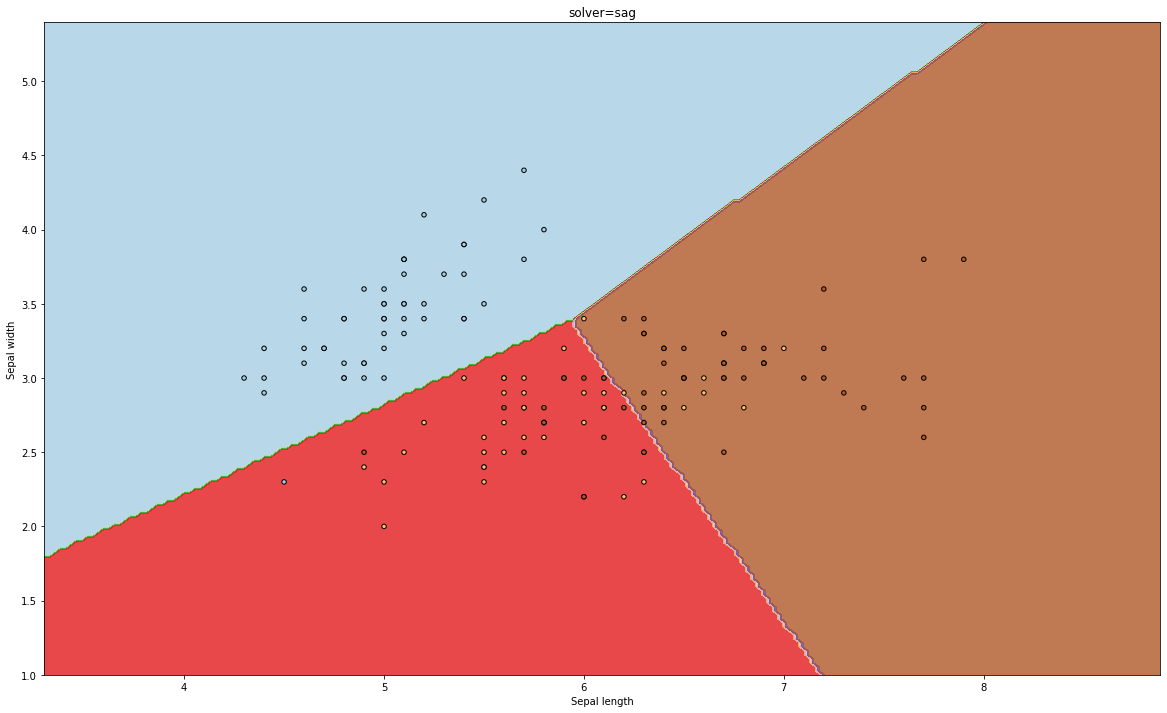

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


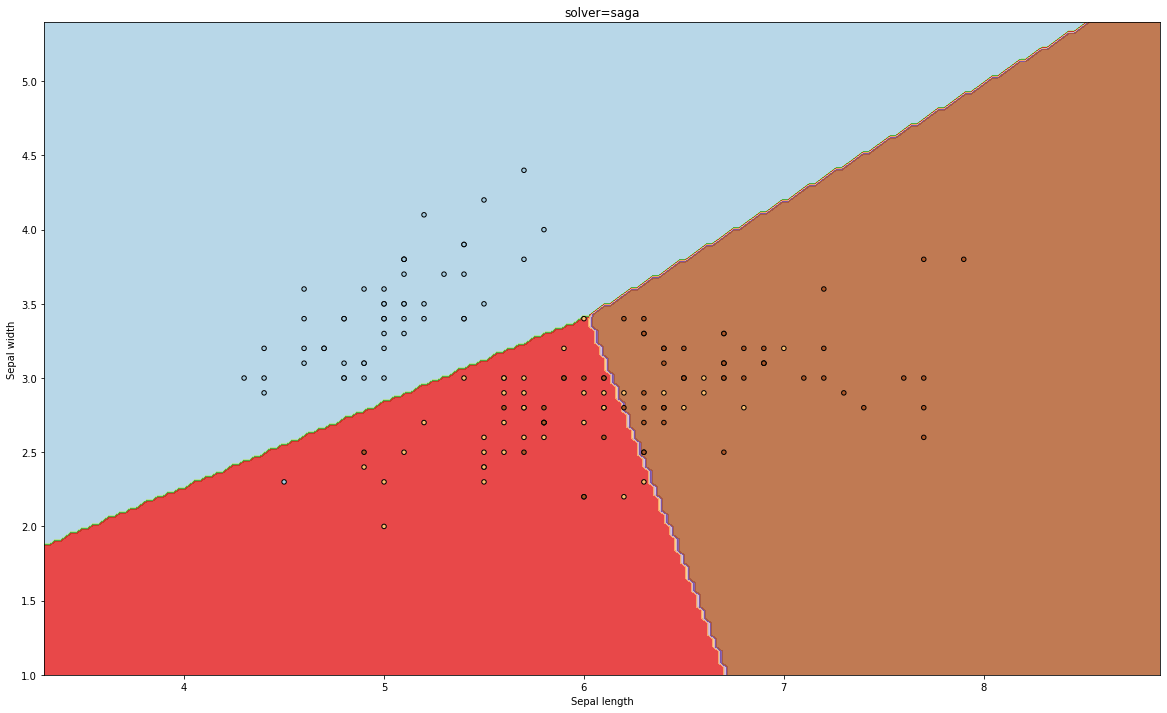

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [24]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solver in solvers:
    svc = LogisticRegression(solver=solver).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    plotSVC(f'solver={solver}')
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

**Grid search**

A continuación prueba el grid search con el siguiente `param_grid`
```python
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'warn']
}
```

In [47]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'warn']
}

# Create a based model
rf = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'multi_class': 'auto', 'solver': 'newton-cg'}
Accuracy score:  
 0.9
Confusion matrix: 
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


/home/alicia/workspace/eoi-ciencia-datos/.venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.79166667 0.79166667 0.73333333 0.78333333 0.78333333        nan
        nan        nan        nan        nan]
  warnings.warn(


### Naïve Bayes

Accuracy score: 90%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



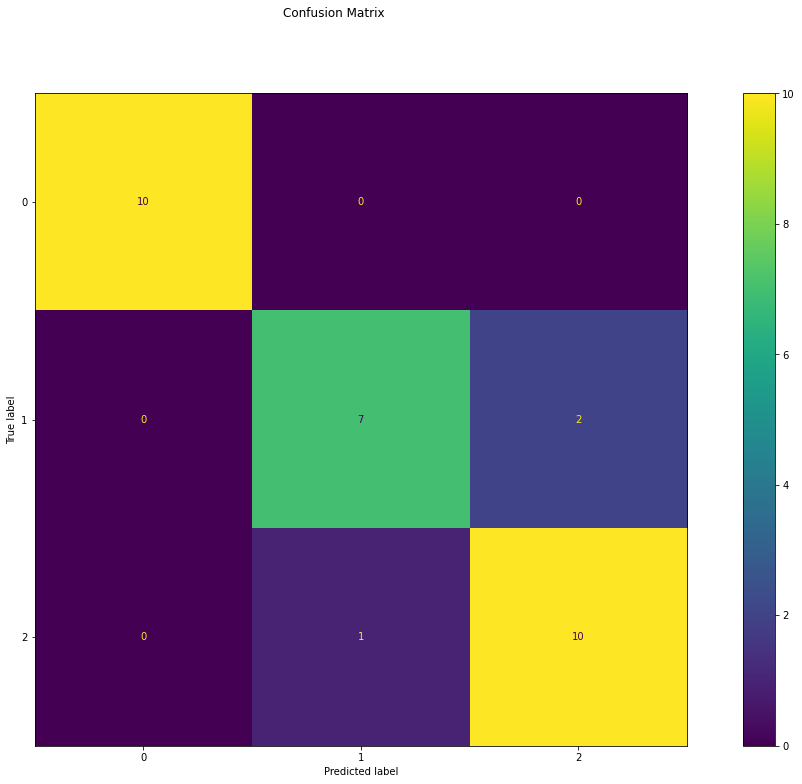

In [26]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
show_metrics(gaussian, y_test, y_pred)

# algorithm_accuracy.append((gaussian, accuracy))

**Áreas de decisión**

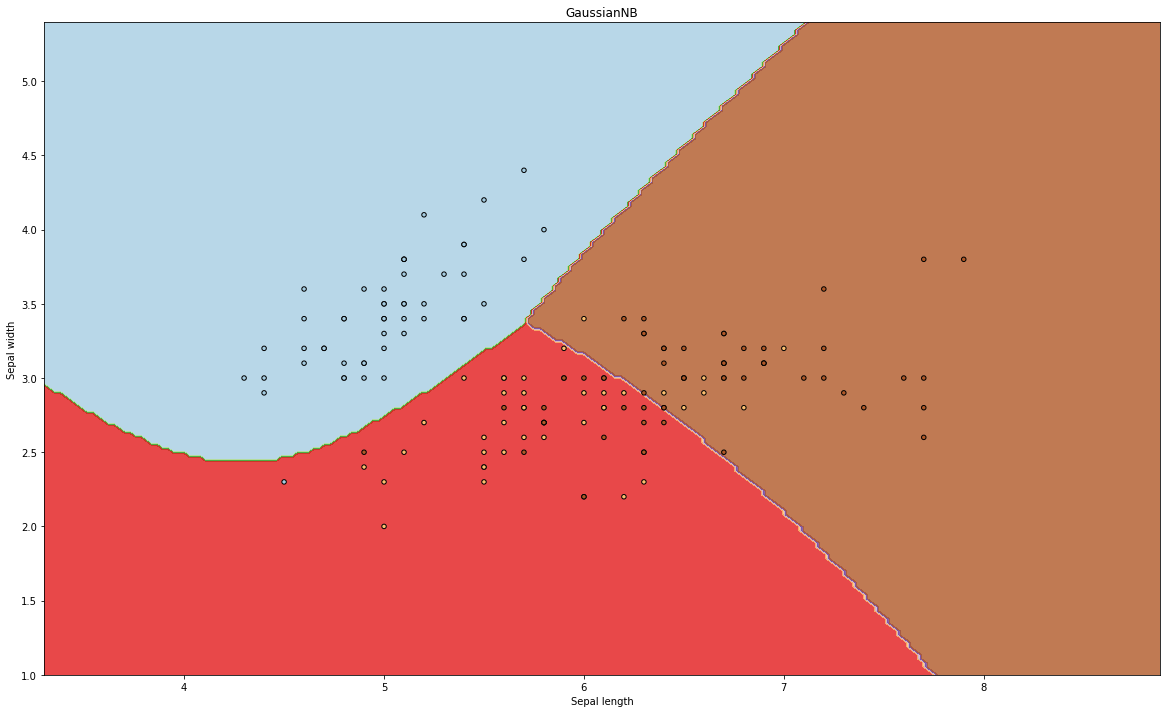

In [27]:
svc = gaussian
plotSVC('GaussianNB')

### Decision tree

Accuracy score: 63%

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



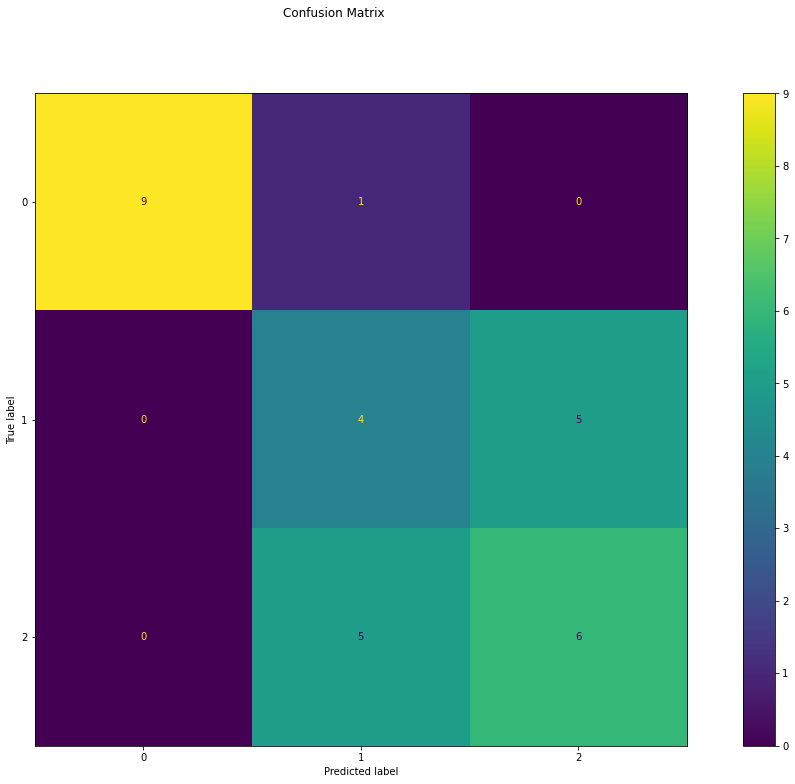

In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)

show_metrics(decision_tree, y_test, y_pred)

**Áreas de decisión**

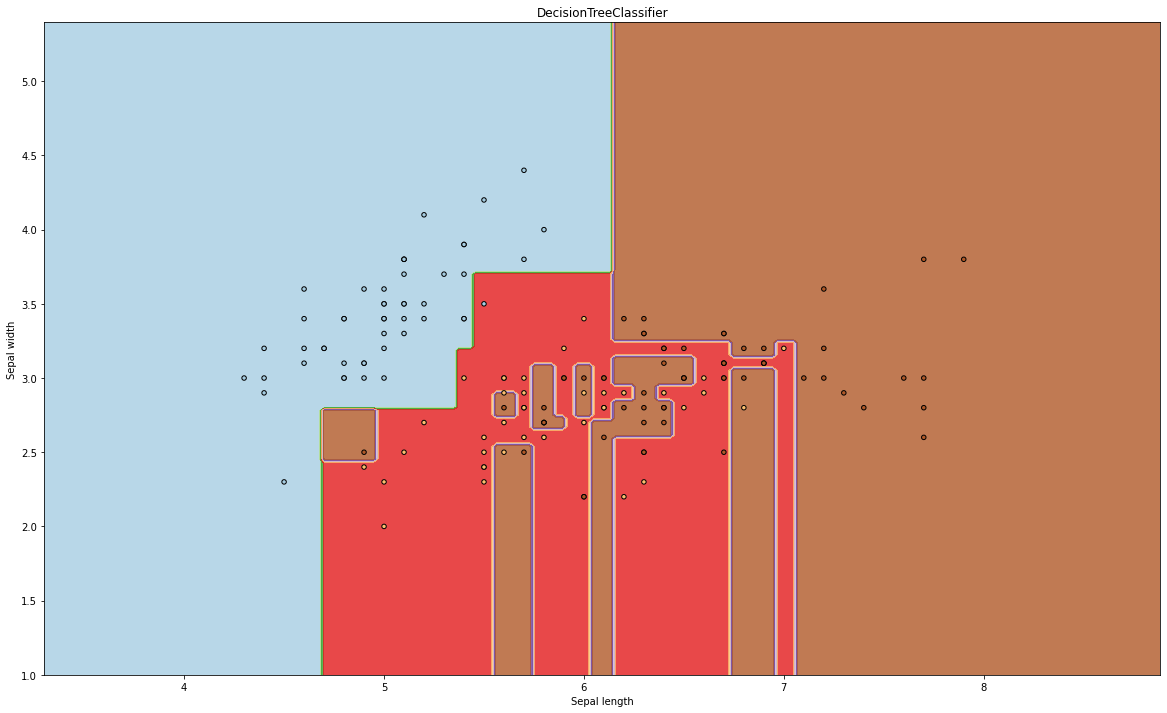

In [29]:
svc = DecisionTreeClassifier().fit(X_train, y_train)  
plotSVC('DecisionTreeClassifier')

**Grid search**

In [48]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_split': range(10,500,20),
    'max_depth': range(1,20,2),
}

# Create a based model
dt = DecisionTreeClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 250 candidates, totalling 750 fits
Best params: {'max_depth': 5, 'min_samples_split': 10}
Accuracy score:  
 0.7333333333333333
Confusion matrix: 
 [[9 1 0]
 [0 7 2]
 [0 5 6]]


### Random forest

Accuracy score: 76%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.62      0.56      0.59         9
           2       0.67      0.73      0.70        11

    accuracy                           0.77        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.77      0.77      0.76        30



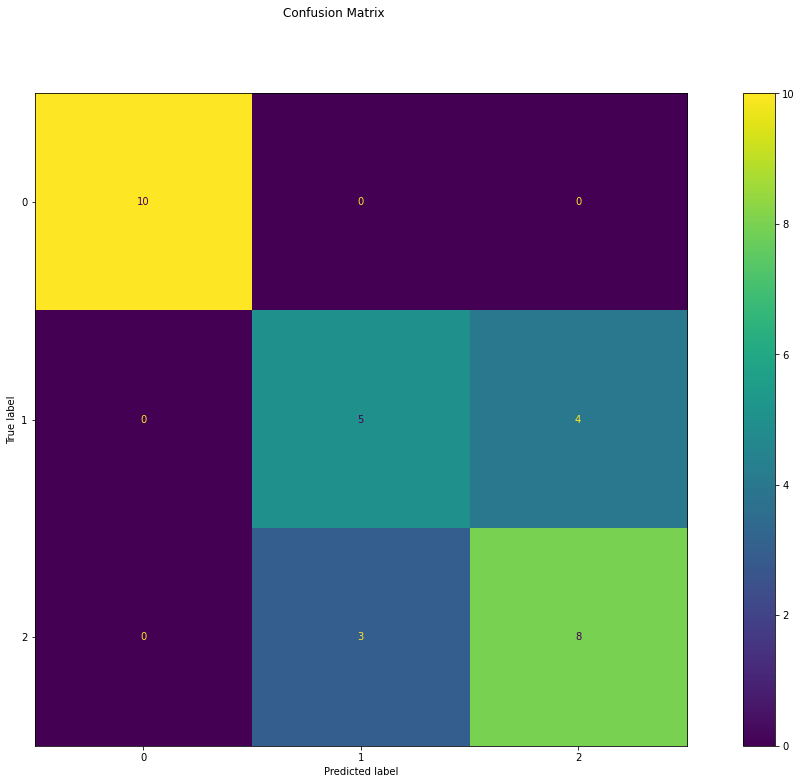

In [31]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

**Importancia de las features**

En random forest podemos visualizar la importancia que ha tenido cada features en el entrenamiento. Visualiza los resultados en una tabla y en un gráfico de barras

In [32]:
importances = pd.DataFrame(
    {'feature':df.drop("species", axis=1).columns,
     'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
sepal length (cm),0.624
sepal width (cm),0.376


<AxesSubplot:xlabel='feature'>

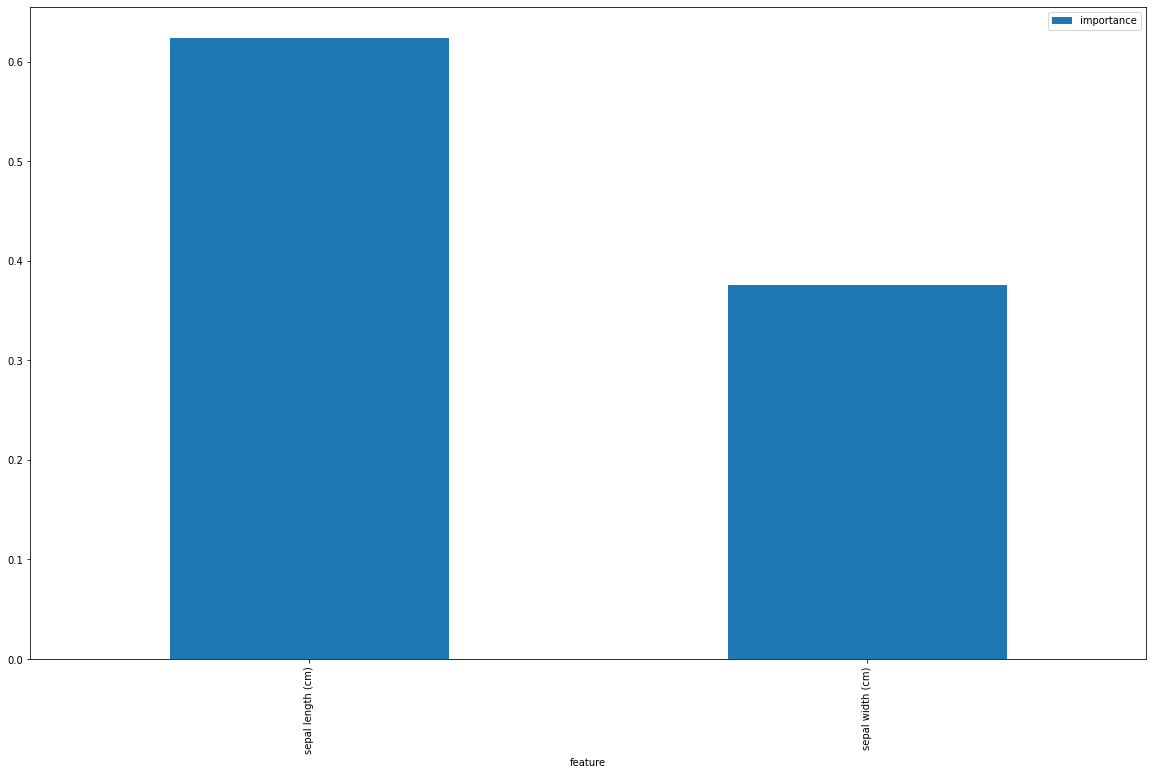

In [33]:
importances.plot.bar()

**Áreas de decisión**

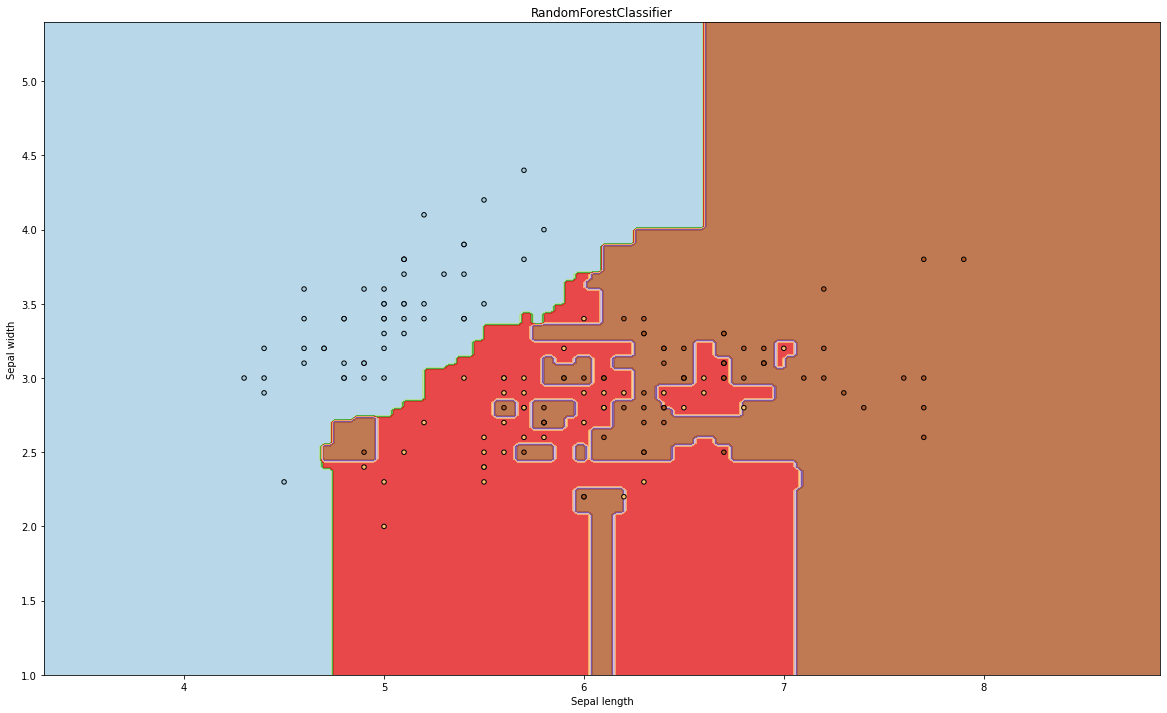

In [34]:
svc = RandomForestClassifier().fit(X_train, y_train)  
plotSVC('RandomForestClassifier')

**Grid search**

In [35]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [1, 2],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Best params: {'bootstrap': True, 'max_depth': 100, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}
Accuracy score:  
 0.8
Confusion matrix: 
 [[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]


### Support Vector Machine

Accuracy score: 90%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



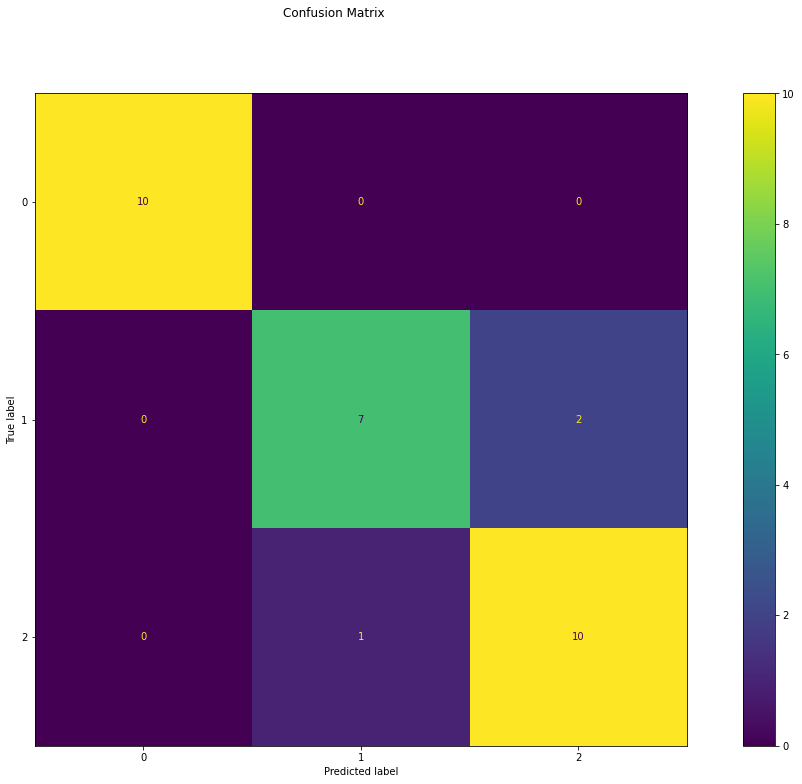

In [36]:
from sklearn.svm import SVC, LinearSVC

linear_svc = SVC(gamma='auto')
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

show_metrics(linear_svc, y_test, y_pred)

**Áreas de decisión**

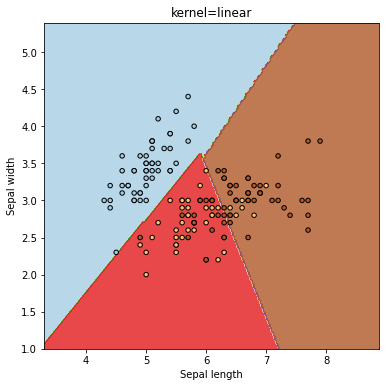

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


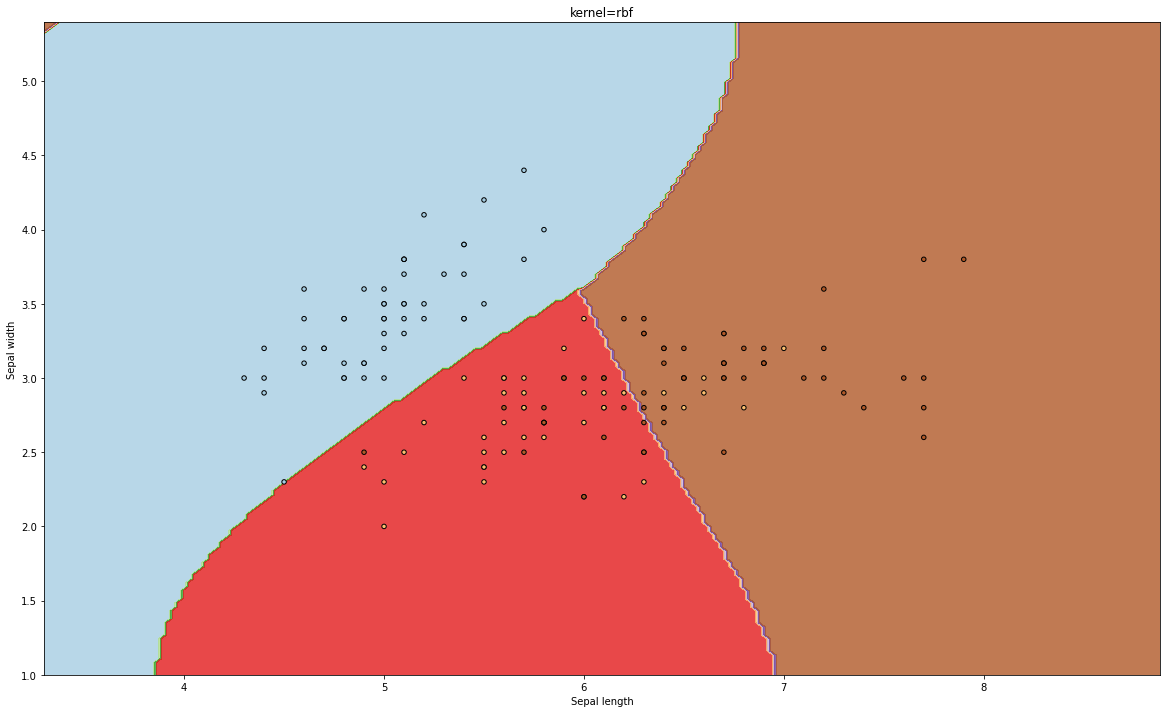

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


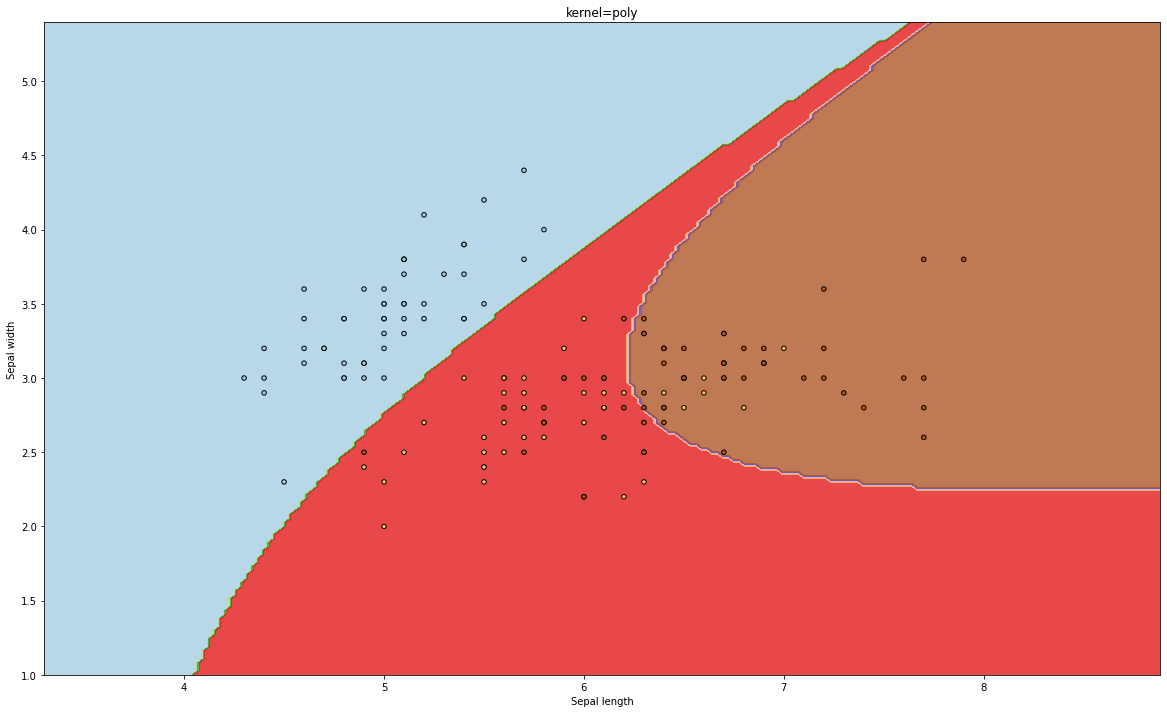

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


In [37]:
plt.figure(figsize=(6,6))
# Kernel parameters
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svc = SVC(kernel=kernel, gamma='auto').fit(X, y)
    y_pred = svc.predict(X_test)
    plotSVC(f'kernel={kernel}')
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

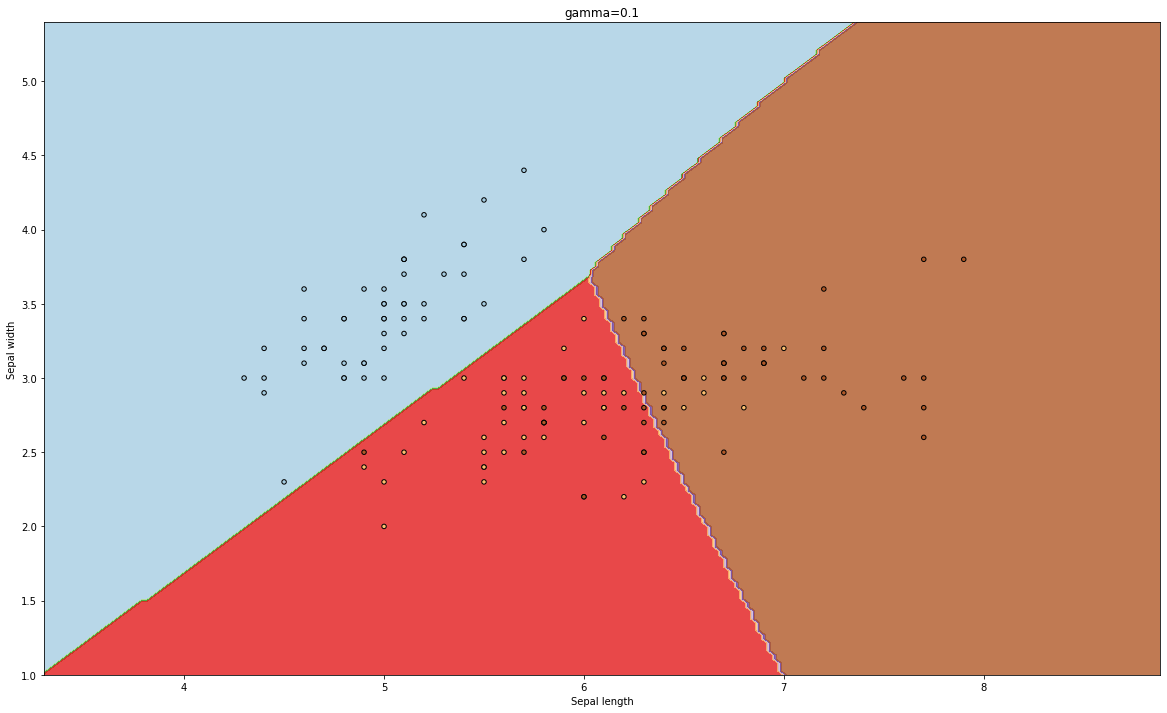

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


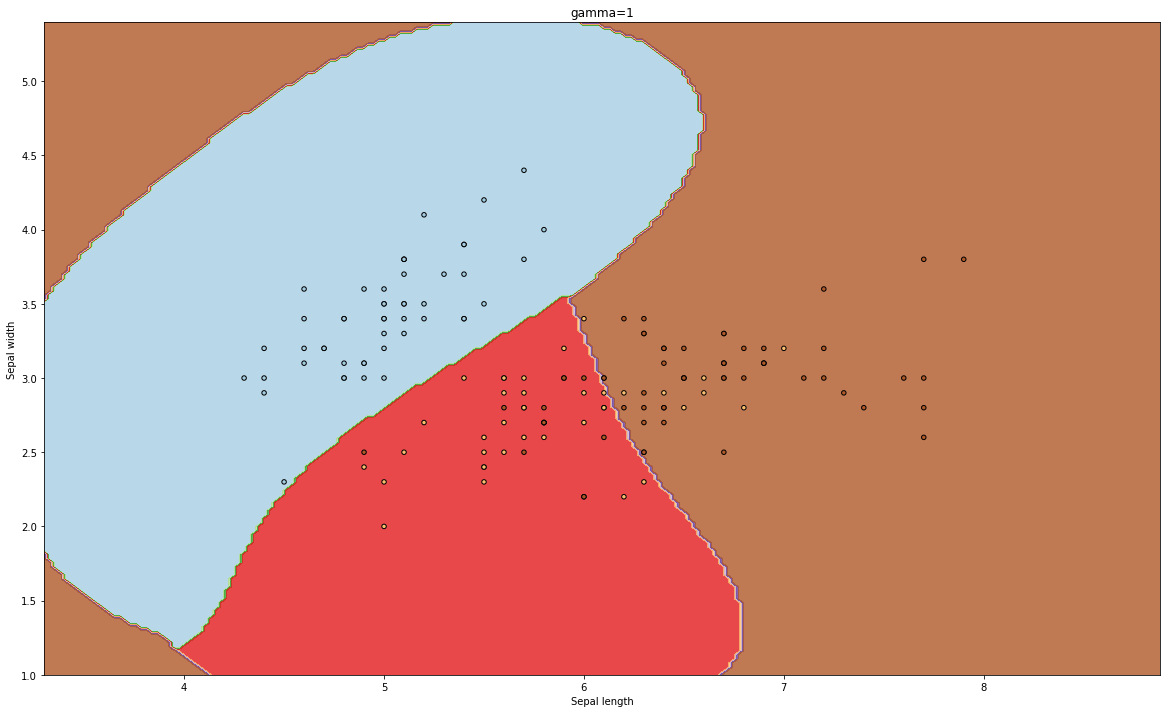

0.9333333333333333
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


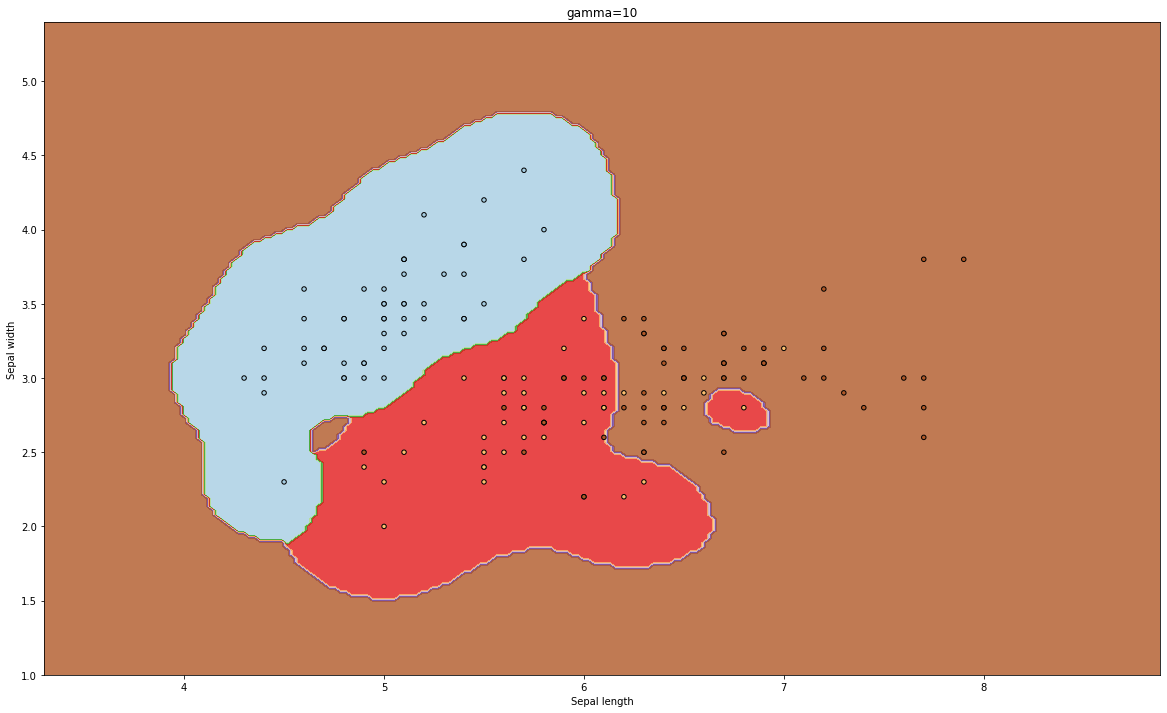

0.9333333333333333
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


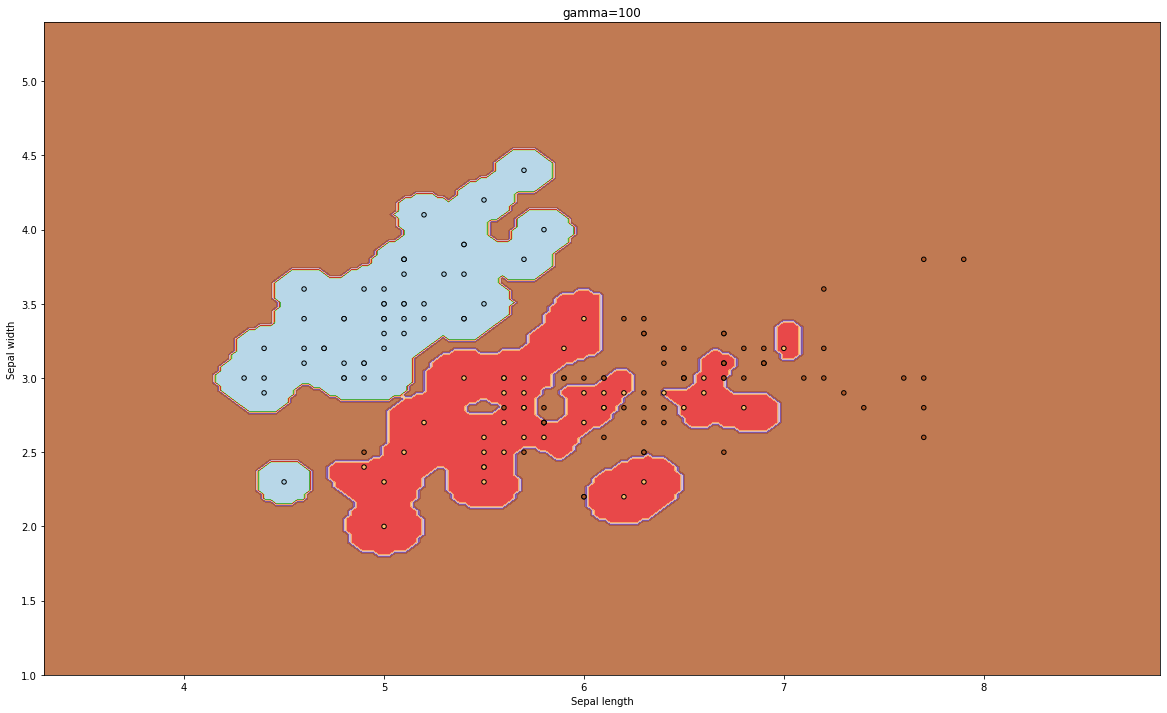

0.9333333333333333
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [38]:
# gamma is a parameter for non linear hyperplanes. 
# The higher the gamma value it tries to exactly fit the training data set

gammas = [0.1, 1, 10, 100]
for gamma in gammas:
    svc = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC(f'gamma={gamma}')
    y_pred = svc.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

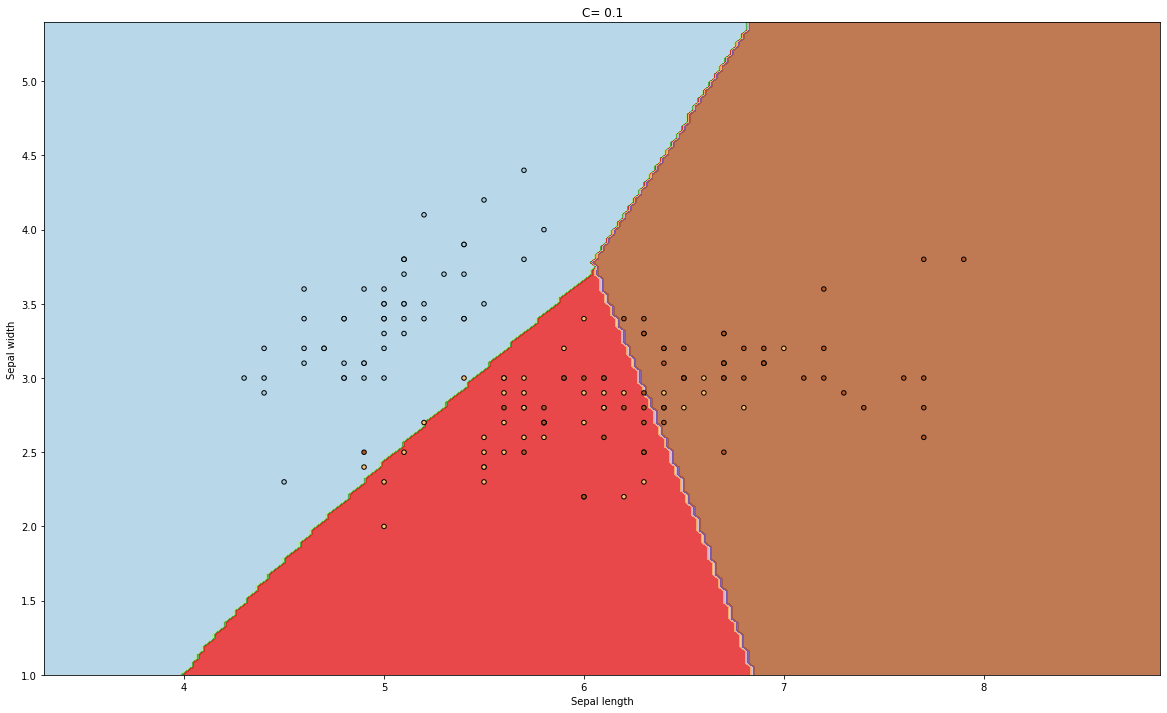

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


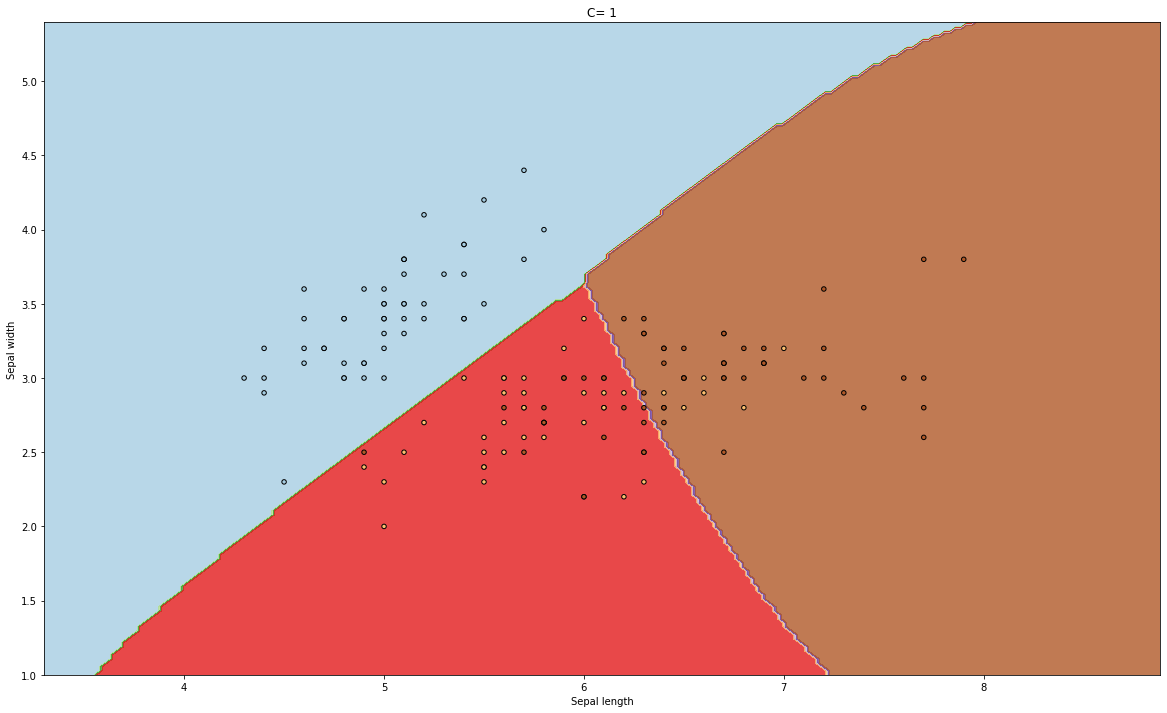

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


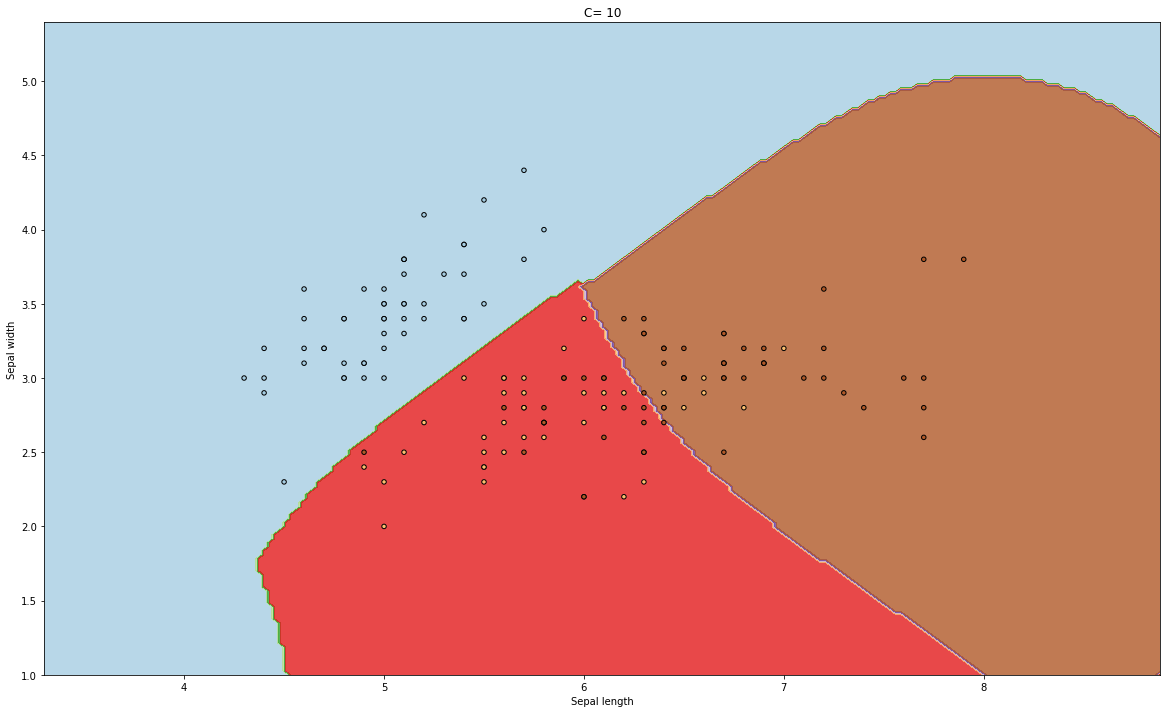

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


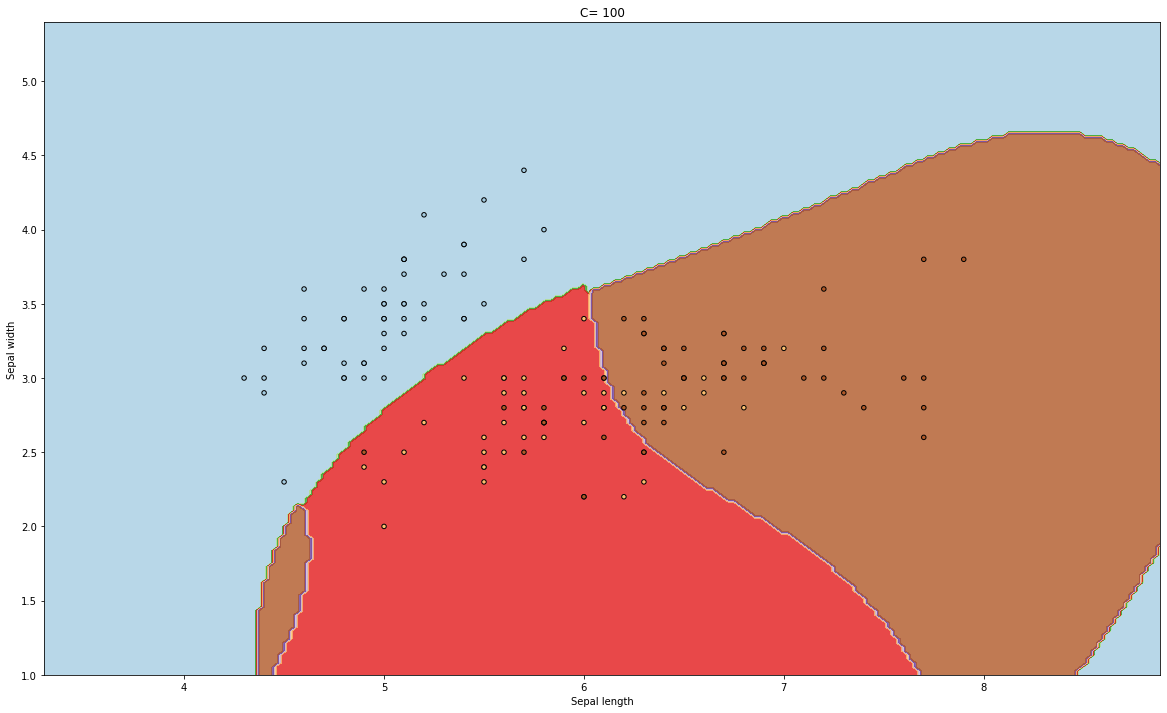

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


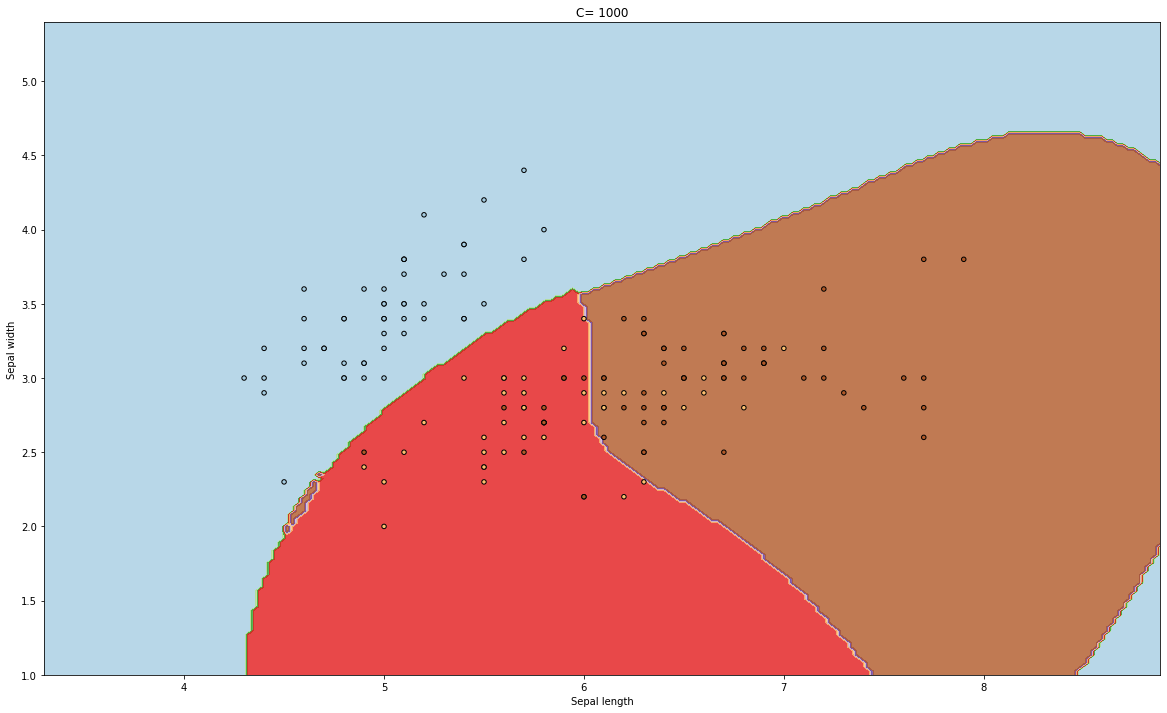

0.9
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]


In [39]:
# C is the penalty parameter of the error term. 
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
# Increasing C values may lead to overfitting the training data.
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
    svc = SVC(kernel='rbf', gamma='scale', C=c).fit(X, y)
    plotSVC(f'C= {c}')    
    
    y_pred = svc.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

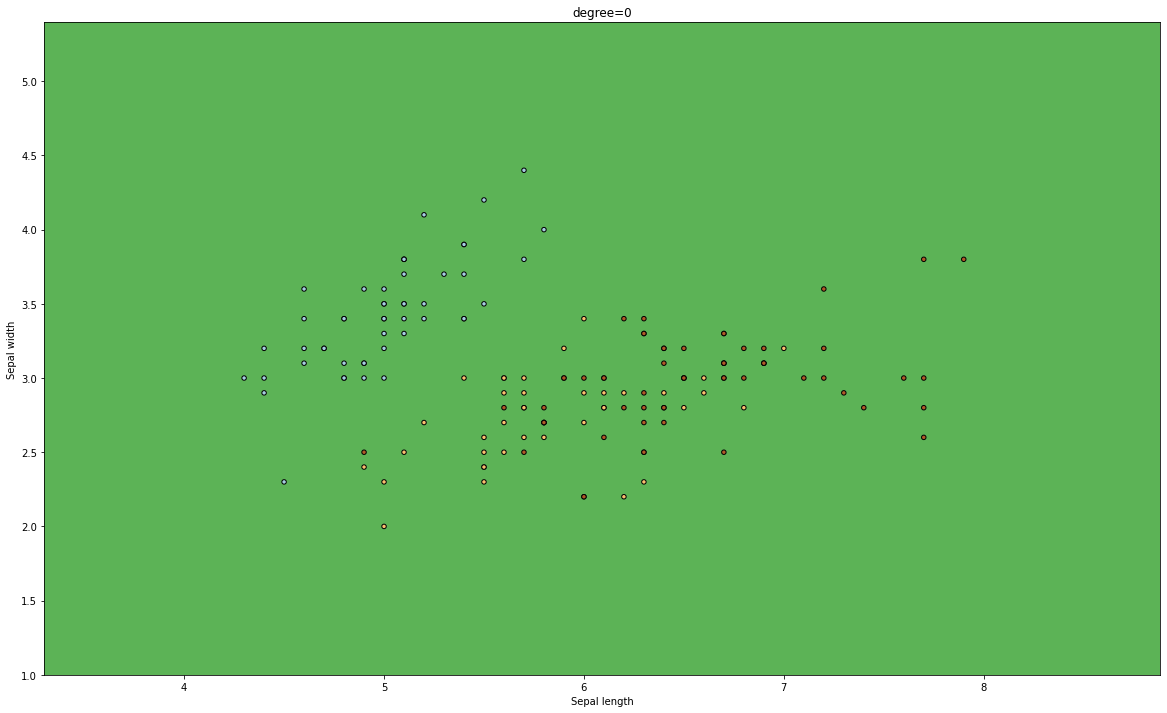

0.36666666666666664
[[ 0  0 10]
 [ 0  0  9]
 [ 0  0 11]]


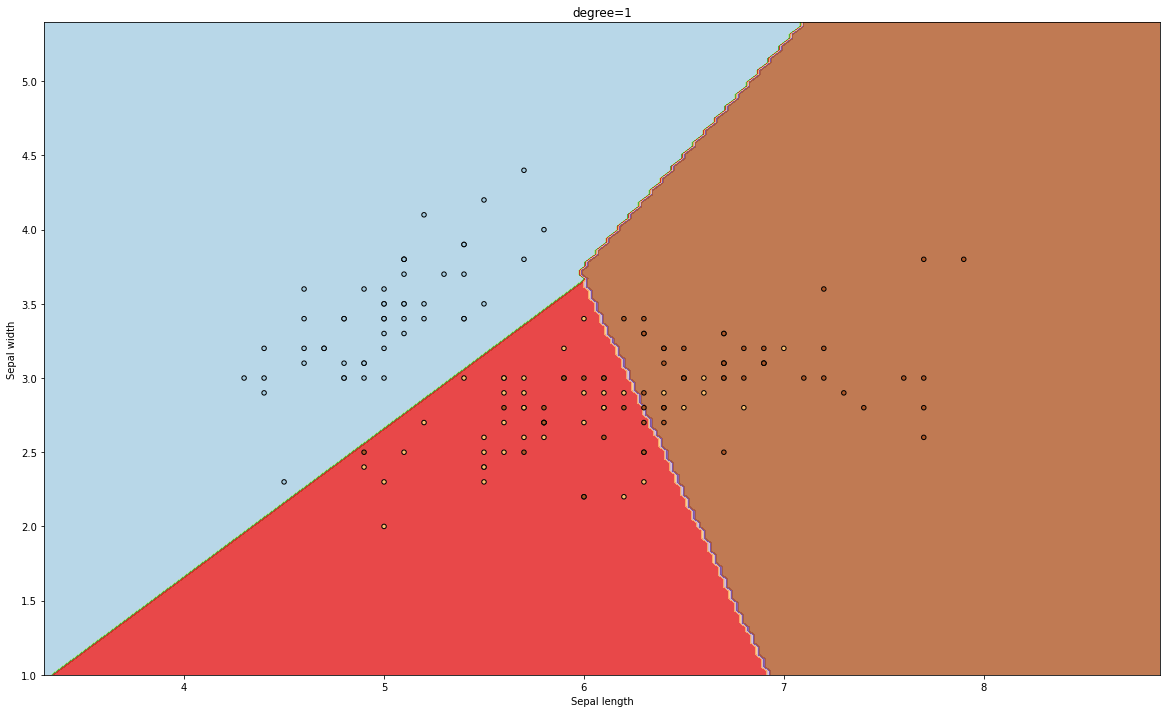

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


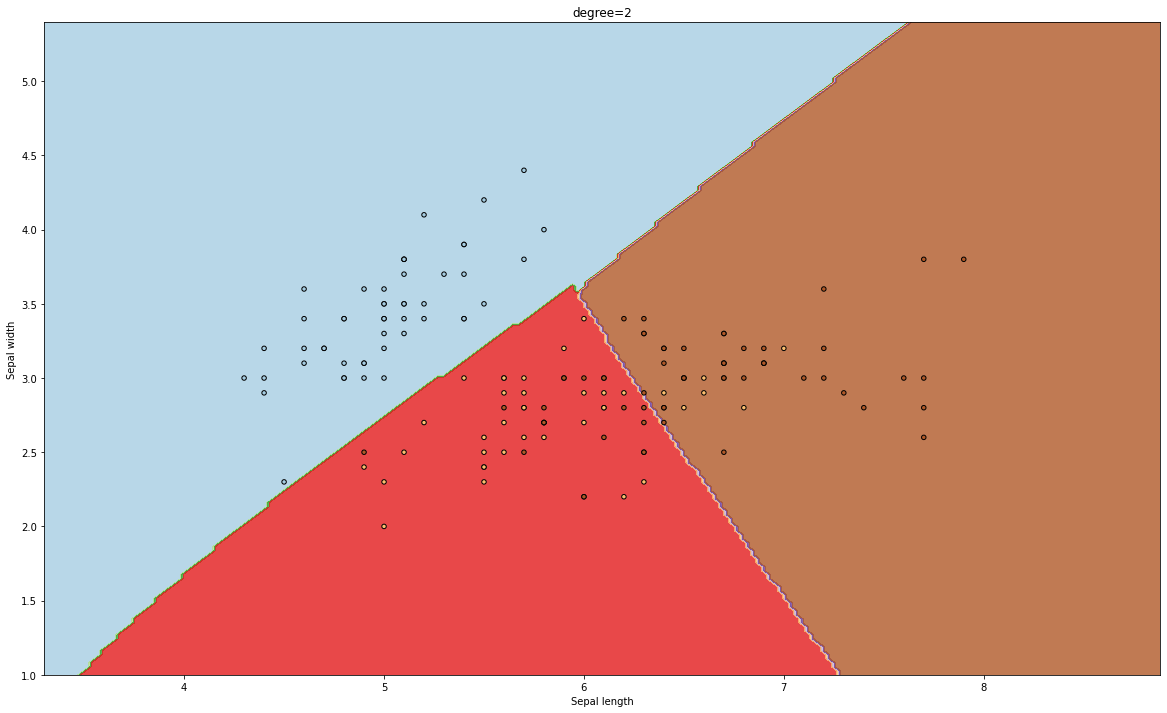

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


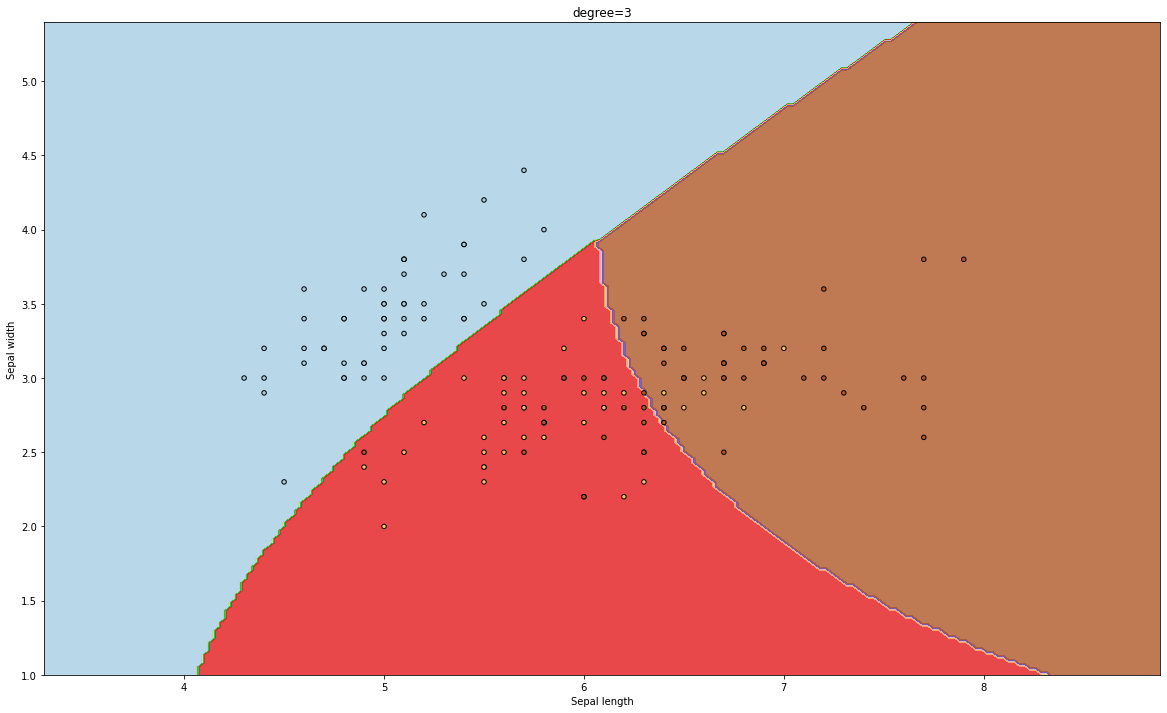

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


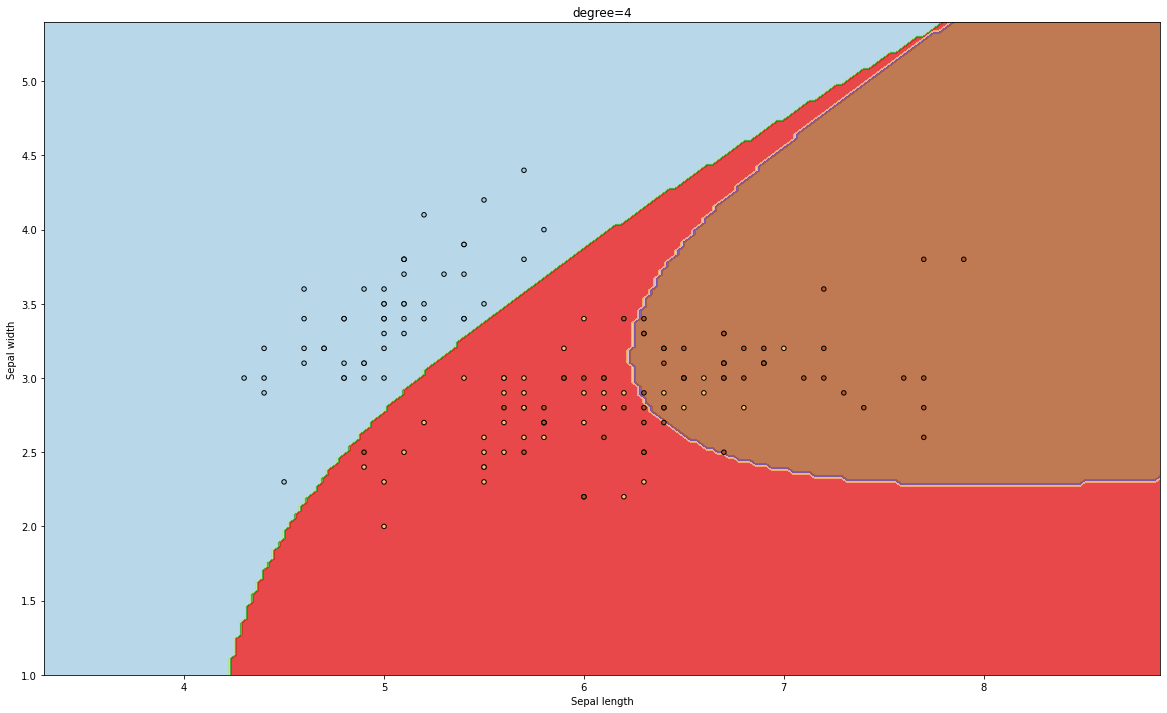

0.9
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


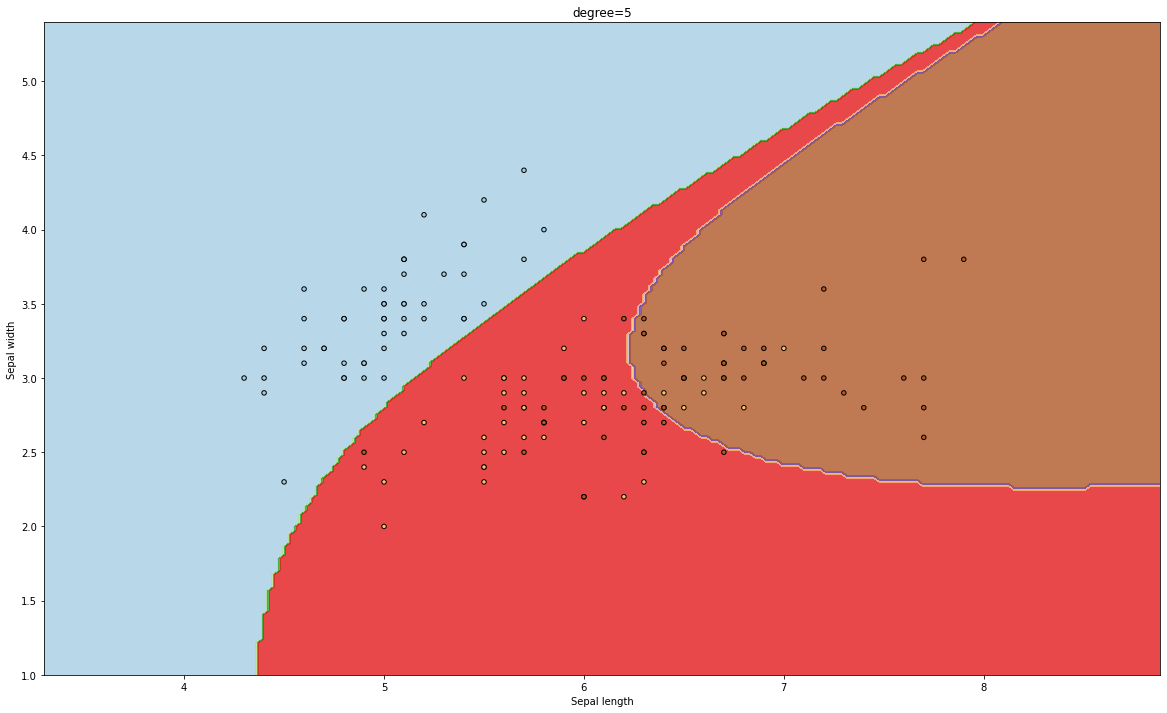

0.8666666666666667
[[10  0  0]
 [ 0  7  2]
 [ 0  2  9]]


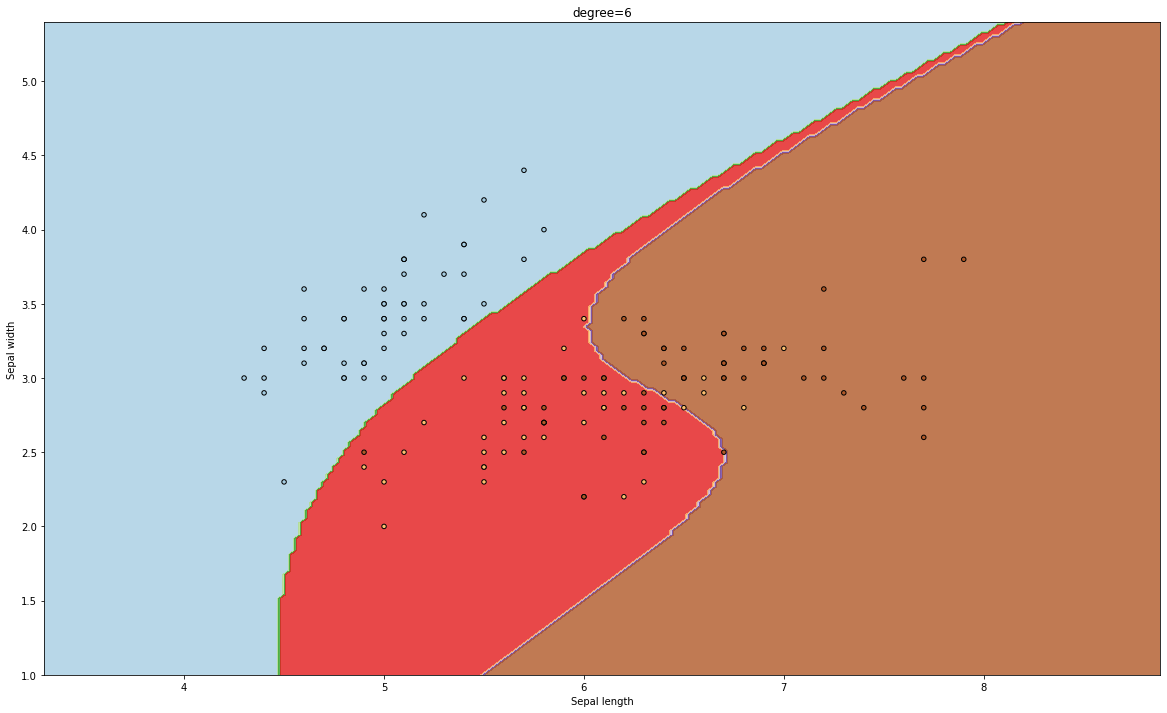

0.8333333333333334
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


In [40]:
# degree is a parameter used when kernel is set to ‘poly’. 
# It’s basically the degree of the polynomial used to find the hyperplane to split the data.
degrees = [0, 1, 2, 3, 4, 5, 6]
for degree in degrees:
    svc = SVC(kernel='poly', gamma='scale', degree=degree).fit(X, y)
    plotSVC(f'degree={degree}')
        
    y_pred = svc.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

**Grid search**

In [41]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [0, 1, 2, 3, 4, 5, 6],
}
# Create a based model
svc = SVC()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 420 candidates, totalling 1260 fits
Best params: {'C': 0.01, 'degree': 6, 'gamma': 1, 'kernel': 'poly'}
Accuracy score:  
 0.8666666666666667
Confusion matrix: 
 [[10  0  0]
 [ 0  6  3]
 [ 0  1 10]]


### K Nearest Neighbors

Accuracy score: 80%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



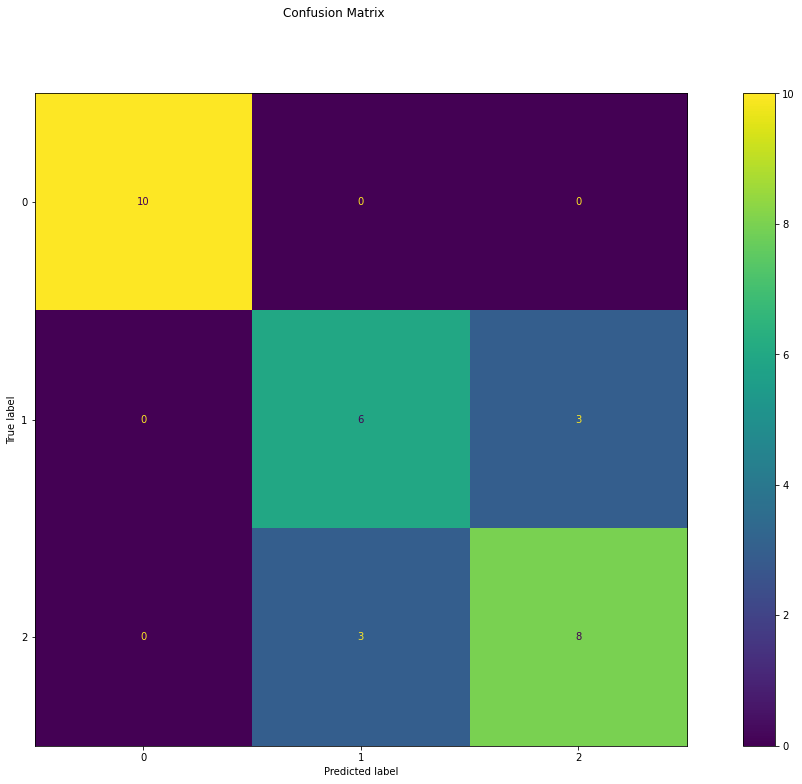

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

show_metrics(knn, y_test, y_pred)

**Obteniendo el valor de K**

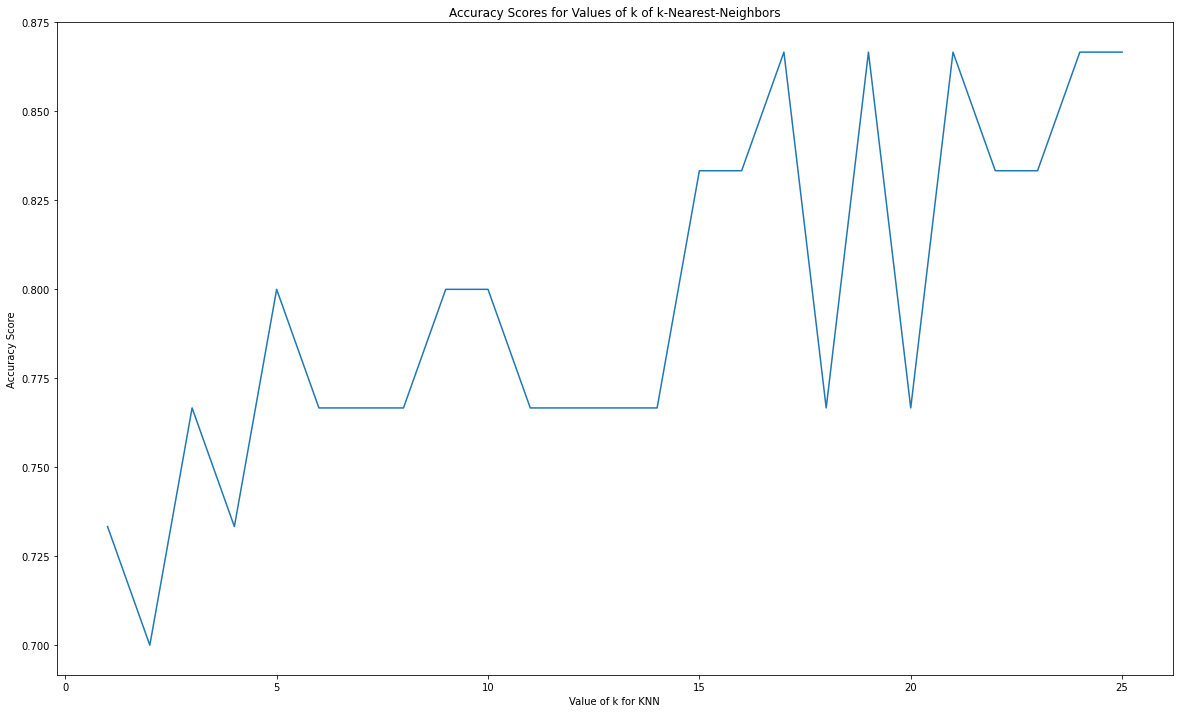

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## Predicción

In [44]:
sorted_algorithm_accuracy = sorted(algorithm_accuracy, key=lambda tup: tup[1])
for algorithm, accuracy in sorted_algorithm_accuracy:
    print(f'{accuracy:.2f} | {algorithm.__class__}')

0.73 | <class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.80 | <class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.83 | <class 'sklearn.linear_model._logistic.LogisticRegression'>
0.87 | <class 'sklearn.svm._classes.SVC'>
0.90 | <class 'sklearn.linear_model._logistic.LogisticRegression'>


In [45]:
classifier = sorted_algorithm_accuracy[-2][0]

In [46]:
print(f'Int classes: {classifier.classes_}')
str_classes = le.inverse_transform(classifier.classes_)
print(f'Str classes: {str_classes}')

Int classes: [0 1 2]


NameError: name 'le' is not defined

In [ ]:
# Creamos una nueva instancia de planta:
sepal_width = 5
sepal_length = 3
new_plant = np.array([[sepal_width, sepal_length]])

predictions = classifier.predict_proba(new_plant)
print(f'Sepal width: {sepal_width}')
print(f'Sepal lenth: {sepal_length}')
print(f'Prediction: {list(zip(str_classes, predictions[0]))}')

In [ ]:
# Creamos una nueva instancia de planta:
sepal_width = 5
sepal_length = 3
new_plant = np.array([[sepal_width, sepal_length]])

le.inverse_transform(classifier.predict(new_plant))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 12) 
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

accuracy_score(y_test, y_pred)

**Áreas de decisión**

In [ ]:
# experimenting with different n values
k_range = range(1,10)
for k in k_range:
    svc = KNeighborsClassifier(n_neighbors=k)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    plotSVC(f'k={k}')
        
    y_pred = svc.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

**Grid search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_neighbors': list(range(1,20)),
}
# Create a based model
knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))